In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**LOADING THE DATASET**

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/United_Hackathon/callsf0d4f5a.csv')
data

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript
0,4667960400,2033123310,963118,7/31/2024 23:56,8/1/2024 0:03,8/1/2024 0:34,\n\nAgent: Thank you for calling United Airlin...
1,1122072124,8186702651,519057,8/1/2024 0:03,8/1/2024 0:06,8/1/2024 0:18,\n\nAgent: Thank you for calling United Airlin...
2,6834291559,2416856629,158319,7/31/2024 23:59,8/1/2024 0:07,8/1/2024 0:26,\n\nAgent: Thank you for calling United Airlin...
3,2266439882,1154544516,488324,8/1/2024 0:05,8/1/2024 0:10,8/1/2024 0:17,\n\nAgent: Thank you for calling United Airlin...
4,1211603231,5214456437,721730,8/1/2024 0:04,8/1/2024 0:14,8/1/2024 0:23,\n\nAgent: Thank you for calling United Airlin...
...,...,...,...,...,...,...,...
71805,1563273072,8022667294,413148,8/31/2024 23:48,8/31/2024 23:57,9/1/2024 0:25,\n\nAgent: Thank you for calling United Airlin...
71806,8865997781,4474867021,980156,8/31/2024 23:55,8/31/2024 23:58,9/1/2024 0:06,\n\nAgent: Thank you for calling United Airlin...
71807,8019240181,9762042472,616988,8/31/2024 23:52,8/31/2024 23:58,9/1/2024 0:04,\n\nAgent: Thank you for calling United Airlin...
71808,8332067080,8095620266,161354,8/31/2024 23:53,8/31/2024 23:59,9/1/2024 0:03,\n\nAgent: Thank you for calling United Airlin...


In [ ]:
customer_data=pd.read_csv('/content/drive/MyDrive/United_Hackathon/customers2afd6ea.csv')
customer_data

,customer_id,customer_name,elite_level_code
0,2033123310,Matthew Foster,4.0
1,8186702651,Tammy Walters,NaN
2,2416856629,Jeffery Dixon,NaN
3,1154544516,David Wilkins,2.0
4,5214456437,Elizabeth Daniels,0.0
...,...,...,...
71805,8022667294,Dennis Singleton DDS,NaN
71806,4474867021,Paul Mitchell,1.0
71807,9762042472,Kaylee Lang,NaN
71808,8095620266,Christine Oneal,1.0


In [ ]:
sentiment_data=pd.read_csv('/content/drive/MyDrive/United_Hackathon/sentiment_statisticscc1e57a.csv')
sentiment_data

,call_id,agent_id,agent_tone,customer_tone,average_sentiment,silence_percent_average
0,4667960400,963118,neutral,angry,-0.04,0.39
1,1122072124,519057,calm,neutral,0.02,0.35
2,6834291559,158319,neutral,polite,-0.13,0.32
3,2266439882,488324,neutral,frustrated,-0.20,0.20
4,1211603231,721730,neutral,polite,-0.05,0.35
...,...,...,...,...,...,...
71805,1563273072,413148,calm,calm,0.05,0.34
71806,8865997781,980156,calm,frustrated,0.03,0.22
71807,8019240181,616988,calm,polite,0.05,0.42
71808,8332067080,161354,neutral,polite,-0.07,0.13


In [ ]:
reason_data=pd.read_csv('/content/drive/MyDrive/United_Hackathon/reason18315ff.csv')
reason_data

,call_id,primary_call_reason
0,4667960400,Voluntary Cancel
1,1122072124,Booking
2,6834291559,IRROPS
3,2266439882,Upgrade
4,1211603231,Seating
...,...,...
66648,7569738090,Mileage Plus
66649,1563273072,Post Flight
66650,8865997781,Upgrade
66651,8019240181,Upgrade


**PRE-PROCESSING OF THE DATASETS**

Finding information of Calls Dataset and Checking Of NULL Values

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71810 entries, 0 to 71809
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   call_id                  71810 non-null  int64 
 1   customer_id              71810 non-null  int64 
 2   agent_id                 71810 non-null  int64 
 3   call_start_datetime      71810 non-null  object
 4   agent_assigned_datetime  71810 non-null  object
 5   call_end_datetime        71810 non-null  object
 6   call_transcript          71810 non-null  object
dtypes: int64(3), object(4)
memory usage: 3.8+ MB


In [ ]:
data.isnull().sum()

,0
call_id,0
customer_id,0
agent_id,0
call_start_datetime,0
agent_assigned_datetime,0
call_end_datetime,0
call_transcript,0


Finding attributes type of Customer Data File and Checking For null Values

In [ ]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71810 entries, 0 to 71809
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       71810 non-null  int64  
 1   customer_name     71810 non-null  object 
 2   elite_level_code  46043 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.6+ MB


In [ ]:
customer_data.isnull().sum()

,0
customer_id,0
customer_name,0
elite_level_code,25767


In [ ]:
customer_data.elite_level_code.unique()

array([ 4., nan,  2.,  0.,  5.,  1.,  3.])

In [ ]:
val=customer_data.elite_level_code.mode()[0];
customer_data['elite_level_code'].fillna(val,inplace=True)

<ipython-input-13-3e0eaa93a8f4>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  customer_data['elite_level_code'].fillna(val,inplace=True)


In [ ]:
customer_data.elite_level_code.unique()

array([4., 0., 2., 5., 1., 3.])

In [ ]:
customer_data.isnull().sum()

,0
customer_id,0
customer_name,0
elite_level_code,0


Finding Attributes type of Sentiment Dataset and finding Null Values

In [ ]:
sentiment_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71810 entries, 0 to 71809
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   call_id                  71810 non-null  int64  
 1   agent_id                 71810 non-null  int64  
 2   agent_tone               71593 non-null  object 
 3   customer_tone            71810 non-null  object 
 4   average_sentiment        71701 non-null  float64
 5   silence_percent_average  71810 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 3.3+ MB


In [ ]:
sentiment_data.isnull().sum()

,0
call_id,0
agent_id,0
agent_tone,217
customer_tone,0
average_sentiment,109
silence_percent_average,0


In [ ]:
sentiment_data.agent_tone.unique()

array(['neutral', 'calm', 'frustrated', 'angry', nan, 'polite'],
      dtype=object)

In [ ]:
mode_val=sentiment_data.agent_tone.mode()[0]
sentiment_data['agent_tone'].fillna(mode_val,inplace=True)

<ipython-input-19-5efafcdd12e3>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sentiment_data['agent_tone'].fillna(mode_val,inplace=True)


In [ ]:
sentiment_data.isnull().sum()

,0
call_id,0
agent_id,0
agent_tone,0
customer_tone,0
average_sentiment,109
silence_percent_average,0


In [ ]:
sentiment_data.agent_tone.unique()

array(['neutral', 'calm', 'frustrated', 'angry', 'polite'], dtype=object)

In [ ]:
sentiment_data.average_sentiment.unique()

array([-0.04,  0.02, -0.13, -0.2 , -0.05,  0.1 ,  0.  ,  0.11,  0.06,
       -0.19, -0.01, -0.06, -0.03,  0.26, -0.12, -0.09,  0.08,  0.14,
       -0.1 , -0.18,  0.5 ,  0.04, -0.08, -0.14,  0.01, -0.07,  0.12,
        0.44,  0.05,  0.13,  0.15,  0.18, -0.17, -0.02,  0.07, -0.16,
       -0.11,  0.03, -0.23, -0.38,  0.09, -0.28, -0.15,  0.2 ,  0.22,
       -0.21,  0.31, -0.22,  0.35,  0.32, -0.3 , -0.94, -0.42,  0.38,
       -0.63,  0.33,  0.16, -0.36, -0.39,  0.17, -0.33,  0.19,  0.39,
       -0.35, -0.5 , -0.37, -0.29, -0.27, -0.25, -0.34, -0.31,  0.24,
       -0.47,  0.27, -0.55, -0.32, -0.26,  0.21,   nan, -0.57, -0.46,
       -0.65, -0.41,  0.43,  0.25,  0.23, -0.24,  0.3 , -0.53,  0.29,
       -0.67, -0.4 ,  0.53,  0.28,  0.54,  0.36, -0.44,  0.4 ,  0.78,
       -0.51,  0.45, -1.  , -0.73, -0.59,  0.47,  0.64, -0.45, -0.49,
       -0.48,  0.56,  0.65,  0.42, -0.58, -0.62, -0.54, -0.64,  0.41,
       -0.8 , -0.66, -0.71,  0.67, -0.43,  0.48,  1.38, -0.56,  0.37,
        1.  ,  0.76,

In [ ]:
median_val=sentiment_data.average_sentiment.median()
sentiment_data.average_sentiment.fillna(median_val,inplace=True)

<ipython-input-23-c1aa21caeca6>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sentiment_data.average_sentiment.fillna(median_val,inplace=True)


In [ ]:
sentiment_data.isnull().sum()

,0
call_id,0
agent_id,0
agent_tone,0
customer_tone,0
average_sentiment,0
silence_percent_average,0


In [ ]:
sentiment_data.average_sentiment.unique()

array([-0.04,  0.02, -0.13, -0.2 , -0.05,  0.1 ,  0.  ,  0.11,  0.06,
       -0.19, -0.01, -0.06, -0.03,  0.26, -0.12, -0.09,  0.08,  0.14,
       -0.1 , -0.18,  0.5 ,  0.04, -0.08, -0.14,  0.01, -0.07,  0.12,
        0.44,  0.05,  0.13,  0.15,  0.18, -0.17, -0.02,  0.07, -0.16,
       -0.11,  0.03, -0.23, -0.38,  0.09, -0.28, -0.15,  0.2 ,  0.22,
       -0.21,  0.31, -0.22,  0.35,  0.32, -0.3 , -0.94, -0.42,  0.38,
       -0.63,  0.33,  0.16, -0.36, -0.39,  0.17, -0.33,  0.19,  0.39,
       -0.35, -0.5 , -0.37, -0.29, -0.27, -0.25, -0.34, -0.31,  0.24,
       -0.47,  0.27, -0.55, -0.32, -0.26,  0.21, -0.57, -0.46, -0.65,
       -0.41,  0.43,  0.25,  0.23, -0.24,  0.3 , -0.53,  0.29, -0.67,
       -0.4 ,  0.53,  0.28,  0.54,  0.36, -0.44,  0.4 ,  0.78, -0.51,
        0.45, -1.  , -0.73, -0.59,  0.47,  0.64, -0.45, -0.49, -0.48,
        0.56,  0.65,  0.42, -0.58, -0.62, -0.54, -0.64,  0.41, -0.8 ,
       -0.66, -0.71,  0.67, -0.43,  0.48,  1.38, -0.56,  0.37,  1.  ,
        0.76, -1.05,

Finding the Attributes Type and Null Values Of The Reason Dataset

In [ ]:
reason_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66653 entries, 0 to 66652
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   call_id              66653 non-null  int64 
 1   primary_call_reason  66653 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.0+ MB


In [ ]:
reason_data.isnull().sum()

,0
call_id,0
primary_call_reason,0


In [ ]:
reason_data.primary_call_reason.unique()

array(['Voluntary  Cancel', 'Booking', 'IRROPS', 'Upgrade', 'Seating',
       'Mileage   Plus', 'Checkout', 'Voluntary   Change', 'Post Flight',
       'Check In', 'Other  Topics', 'Communications', 'Schedule Change',
       'Products & Services', 'IRROPS  ', 'Digital   Support',
       'Seating  ', 'Disability', 'Unaccompanied Minor', ' Baggage',
       'Traveler  Updates', 'Communications  ', 'ETC', 'Upgrade  ',
       'Unaccompanied Minor  ', 'Voluntary Change', 'Voluntary Change  ',
       'Checkout  ', 'Mileage Plus', 'Mileage Plus  ', 'Booking  ',
       'Baggage  ', 'Post-Flight', 'Post-Flight  ', 'Schedule Change  ',
       'Baggage', 'Traveler Updates', 'Voluntary Cancel', 'Check-In',
       'Products and Services', 'Check-In  ', 'Other Topics',
       'Other Topics  ', 'ETC  ', 'Disability  ', 'Digital Support',
       'Digital Support  ', 'Voluntary Cancel  ',
       'Products and Services  ', 'Traveler Updates  ',
       'Traveler   Updates', 'Digital  Support', 'Mileage  P

Removing Special Characters,Trailing And Leading Spaces From The columns

In [ ]:
reason_data['primary_call_reason'] = (
    reason_data['primary_call_reason'].str.replace('-', ' ').str.replace('&', 'and')
    .str.replace(r'\s+', ' ', regex=True).str.strip().str.lower())

In [ ]:
reason_data.primary_call_reason.unique()

array(['voluntary cancel', 'booking', 'irrops', 'upgrade', 'seating',
       'mileage plus', 'checkout', 'voluntary change', 'post flight',
       'check in', 'other topics', 'communications', 'schedule change',
       'products and services', 'digital support', 'disability',
       'unaccompanied minor', 'baggage', 'traveler updates', 'etc'],
      dtype=object)

FEATURE ENGINEERING FOR CALCUATION OF AHT(Average Handle Time) &  AST(Average Speed To Answer)

Converting String Object To DateTime

In [ ]:
data['call_start_datetime'] = pd.to_datetime(data['call_start_datetime'])
data['agent_assigned_datetime'] = pd.to_datetime(data['agent_assigned_datetime'])
data['call_end_datetime'] = pd.to_datetime(data['call_end_datetime'])

In [ ]:
# Creating Handling Time And Service Time Column for each Customer In Seconds
data['Handle_Time'] = (data['call_end_datetime'] - data['agent_assigned_datetime']).dt.total_seconds()
data['Waiting_Time']=(data['agent_assigned_datetime'] - data['call_start_datetime']).dt.total_seconds()

In [ ]:
data.isnull().sum()

,0
call_id,0
customer_id,0
agent_id,0
call_start_datetime,0
agent_assigned_datetime,0
call_end_datetime,0
call_transcript,0
Handle_Time,0
Waiting_Time,0


Merging The DataSet To Make A New Big DataSet

In [ ]:
merged_data = data.merge(customer_data, on='customer_id', how='inner') \
                   .merge(reason_data, on='call_id', how='inner') \
                   .merge(sentiment_data, on='call_id', how='inner')
merged_data

In [ ]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66653 entries, 0 to 66652
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   call_id                  66653 non-null  int64         
 1   customer_id              66653 non-null  int64         
 2   agent_id_x               66653 non-null  int64         
 3   call_start_datetime      66653 non-null  datetime64[ns]
 4   agent_assigned_datetime  66653 non-null  datetime64[ns]
 5   call_end_datetime        66653 non-null  datetime64[ns]
 6   call_transcript          66653 non-null  object        
 7   Handle_Time              66653 non-null  float64       
 8   Waiting_Time             66653 non-null  float64       
 9   customer_name            66653 non-null  object        
 10  elite_level_code         66653 non-null  float64       
 11  primary_call_reason      66653 non-null  object        
 12  agent_id_y               66653 n

In [ ]:
merged_data.isnull().sum()

,0
call_id,0
customer_id,0
agent_id_x,0
call_start_datetime,0
agent_assigned_datetime,0
call_end_datetime,0
call_transcript,0
Handle_Time,0
Waiting_Time,0
customer_name,0


**Calculating Average Handle Time And Average Speed Time To Answer**

In [ ]:
# Calculate AHT and AST
total_handle_time = merged_data['Handle_Time'].sum()
total_waiting_time = merged_data['Waiting_Time'].sum()
total_calls = merged_data.call_id.value_counts().sum()
print("Total Handle Time Of All Calls (sec):",total_handle_time)
print("Total Waiting Time Of All Calls (sec):",total_waiting_time)
print("Total Number Of Calls:",total_calls)

Total Handle Time Of All Calls (sec): 46468920.0
Total Waiting Time Of All Calls (sec): 29125500.0
Total Number Of Calls: 66653


In [ ]:
AHT = total_handle_time / total_calls
print("The Average Handle Time Of Calls (sec)",AHT)
AST = total_waiting_time / total_calls
print("The Average Speed To Answer Time Of Calls(sec)",AST)

The Average Handle Time Of Calls (sec) 697.1767212278517
The Average Speed To Answer Time Of Calls(sec) 436.97207927625163


#**Indentifying The Factors Contributing For AHT and AST**#

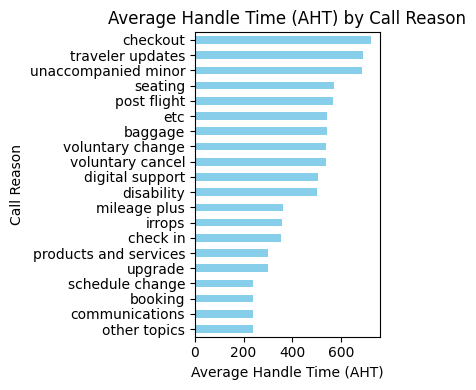

In [ ]:
# Plot AHT by Call Reason
plt.figure(figsize=(4, 4))
merged_data.groupby('primary_call_reason')['Waiting_Time'].mean().sort_values().plot(kind='barh', color='skyblue')
plt.title('Average Handle Time (AHT) by Call Reason')
plt.xlabel('Average Handle Time (AHT)')
plt.ylabel('Call Reason')
plt.tight_layout()
plt.show()

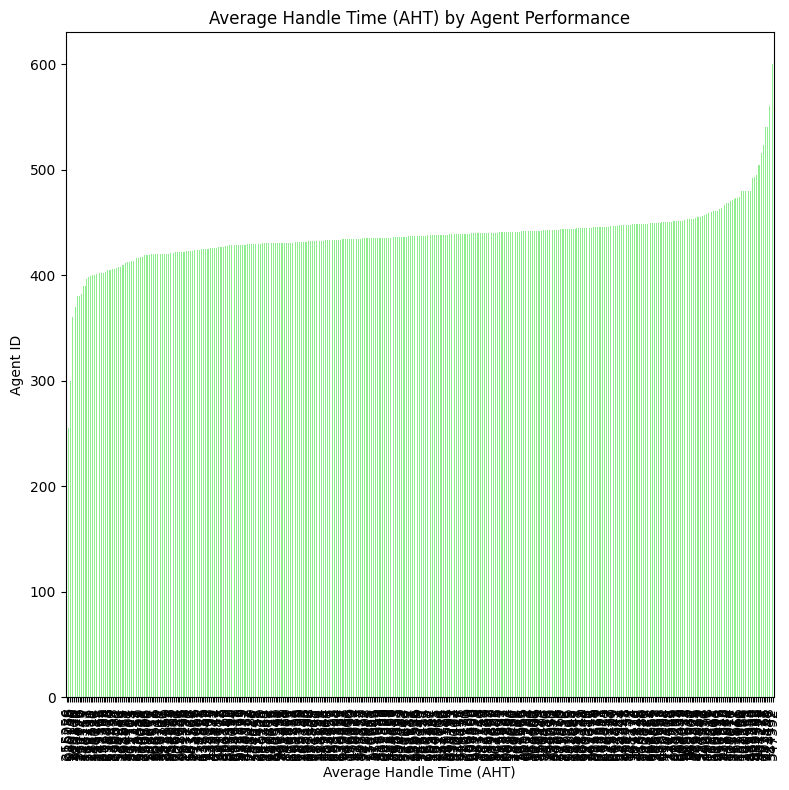

In [ ]:
# Plot AHT by Agent Performance
plt.figure(figsize=(8, 8))
merged_data.groupby('agent_id_x')['Waiting_Time'].mean().sort_values().plot(kind='bar', color='lightgreen')
plt.title('Average Handle Time (AHT) by Agent Performance')
plt.xlabel('Average Handle Time (AHT)')
plt.ylabel('Agent ID')
plt.tight_layout()
plt.show()

<ipython-input-159-7bd7cd485669>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='agent_tone', y='Handle_Time', data=merged_data, palette='Set2')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to

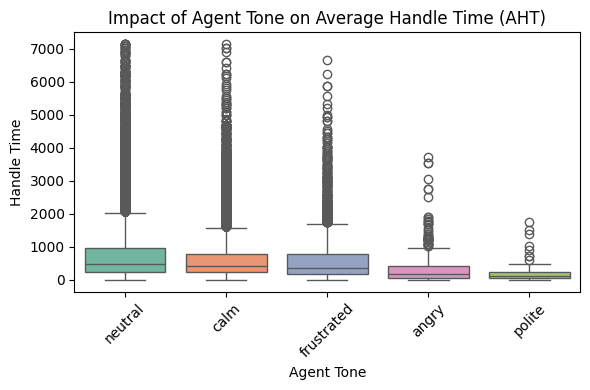

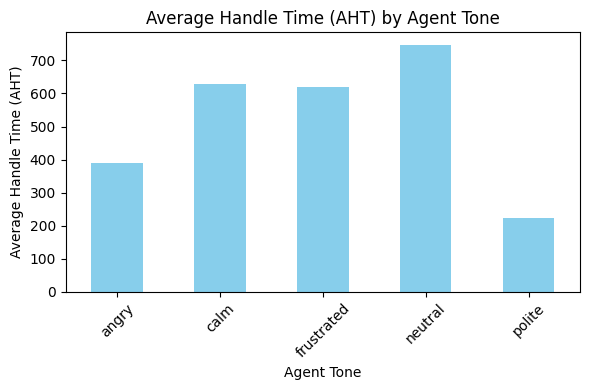

In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='agent_tone', y='Handle_Time', data=merged_data, palette='Set2')
plt.title('Impact of Agent Tone on Average Handle Time (AHT)')
plt.xlabel('Agent Tone')
plt.ylabel('Handle Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Create a bar plot to show mean AHT by agent tone
aht_by_tone = merged_data.groupby('agent_tone')['Handle_Time'].mean()

plt.figure(figsize=(6, 4))
aht_by_tone.plot(kind='bar', color='skyblue')
plt.title('Average Handle Time (AHT) by Agent Tone')
plt.xlabel('Agent Tone')
plt.ylabel('Average Handle Time (AHT)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-158-9f03a89a1e0c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='elite_level_code', y='Handle_Time', data=merged_data, palette='coolwarm')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-

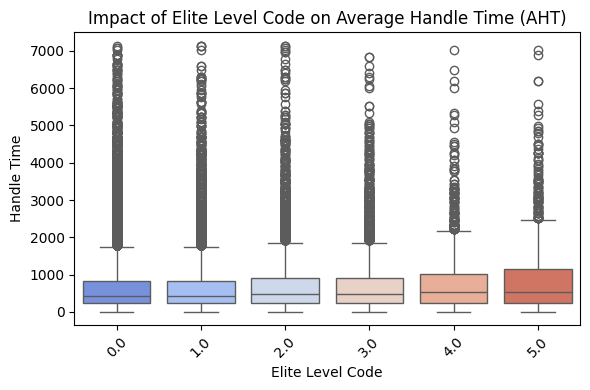

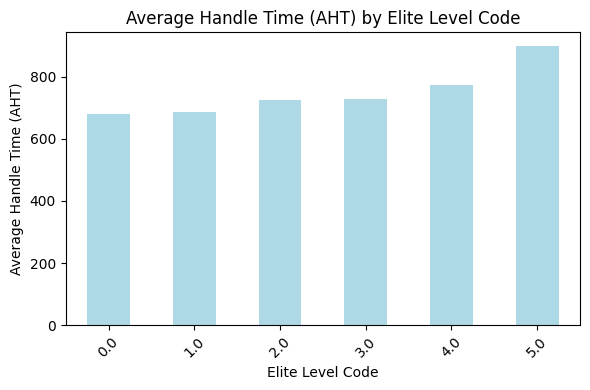

In [ ]:
# Create a boxplot to visualize AHT distribution by elite level code
plt.figure(figsize=(6, 4))
sns.boxplot(x='elite_level_code', y='Handle_Time', data=merged_data, palette='coolwarm')
plt.title('Impact of Elite Level Code on Average Handle Time (AHT)')
plt.xlabel('Elite Level Code')
plt.ylabel('Handle Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Create a bar plot to show mean AHT by elite level code
aht_by_elite_level = merged_data.groupby('elite_level_code')['Handle_Time'].mean()

plt.figure(figsize=(6, 4))
aht_by_elite_level.plot(kind='bar', color='lightblue')
plt.title('Average Handle Time (AHT) by Elite Level Code')
plt.xlabel('Elite Level Code')
plt.ylabel('Average Handle Time (AHT)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#**Percentage Difference Between Average Handle Time Between Most Frequent And Least Frequent call Reasons**#

In [ ]:
# Call reason counts and difference
call_reason_counts = merged_data['primary_call_reason'].value_counts()
print(call_reason_counts)
most_frequent_reason = call_reason_counts.idxmax()
least_frequent_reason = call_reason_counts.idxmin()
aht_most_frequent = aht_by_call_reason[most_frequent_reason]
aht_least_frequent = aht_by_call_reason[least_frequent_reason]

print(aht_most_frequent)
print(aht_least_frequent)

# Calculate the percentage difference
percentage_difference = ((aht_most_frequent - aht_least_frequent) / aht_least_frequent) * 100

# Print outputs
print(f"\nMost Frequent Call Reason: {most_frequent_reason}, AHT: {aht_most_frequent}")
print(f"Least Frequent Call Reason: {least_frequent_reason}, AHT: {aht_least_frequent}")
print(f"Percentage Difference in AHT: {percentage_difference:.2f}%")


primary_call_reason
irrops                   13311
voluntary change         10848
seating                   6365
mileage plus              5851
post flight               4330
communications            3840
products and services     3332
baggage                   2832
upgrade                   2738
booking                   2637
check in                  1904
checkout                  1888
voluntary cancel          1607
digital support           1225
etc                        952
traveler updates           937
other topics               818
schedule change            731
disability                 403
unaccompanied minor        104
Name: count, dtype: int64
785.1160694162722
519.2307692307693

Most Frequent Call Reason: irrops, AHT: 785.1160694162722
Least Frequent Call Reason: unaccompanied minor, AHT: 519.2307692307693
Percentage Difference in AHT: 51.21%


#**Analyzing The Impact Of Average Handle Through Call Transcript And Create Word Cloud For The Same**#

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Call Reason vs Handle Time:
 primary_call_reason
checkout                 1016.853814
mileage plus              995.573406
etc                       962.899160
post flight               932.896074
communications            826.718750
irrops                    785.116069
products and services     746.560624
voluntary cancel          721.866833
voluntary change          639.153761
upgrade                   632.344777
check in                  574.128151
unaccompanied minor       519.230769
schedule change           490.013680
seating                   474.994501
booking                   427.736064
traveler updates          393.233725
digital support           372.293878
other topics              350.097800
baggage                   333.644068
disability                292.109181
Name: Handle_Time, dtype: float64
Agent/Customer Tone vs Handle Time:
 agent_tone  customer_tone
neutral     neutral          759.729527
            calm             749.126067
            angry            746.9

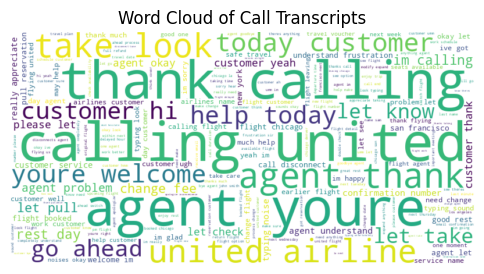

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def preprocess_transcript(transcript):
    if isinstance(transcript, str):

        transcript = re.sub(r'[^a-zA-Z\s]', '', transcript)

        transcript = transcript.lower()

        tokens = word_tokenize(transcript)

        stop_words = set(stopwords.words('english'))
        filtered_tokens = [w for w in tokens if not w in stop_words]

        processed_transcript = ' '.join(filtered_tokens)
        return processed_transcript
    else:
        return None

if 'call_transcript' in merged_data.columns:
    merged_data['processed_transcript'] = merged_data['call_transcript'].apply(preprocess_transcript)


reason_handle_time = merged_data.groupby('primary_call_reason')['Handle_Time'].mean().sort_values(ascending=False)
print("Call Reason vs Handle Time:\n", reason_handle_time)

tone_handle_time = merged_data.groupby(['agent_tone', 'customer_tone'])['Handle_Time'].mean().sort_values(ascending=False)
print("Agent/Customer Tone vs Handle Time:\n", tone_handle_time)

elite_handle_time = merged_data.groupby('elite_level_code')['Handle_Time'].mean().sort_values(ascending=False)
print("Elite Level vs Handle Time:\n", elite_handle_time)


sentiment_handle_time = merged_data.groupby('average_sentiment')['Handle_Time'].mean().sort_values(ascending=False)
print("Sentiment vs Handle Time:\n", sentiment_handle_time)


if 'processed_transcript' in merged_data.columns:
    all_transcripts = ' '.join(merged_data['processed_transcript'].dropna().tolist())

    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_transcripts)
    plt.figure(figsize=(6, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of Call Transcripts')
    plt.show()




<ipython-input-63-30713b836aa8>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sentiment_data['average_sentiment'].fillna(val, inplace=True)


      call_id  customer_id  agent_id_x call_start_datetime  \
0  4667960400   2033123310      963118     7/31/2024 23:56   
1  1122072124   8186702651      519057       8/1/2024 0:03   
2  6834291559   2416856629      158319     7/31/2024 23:59   
3  2266439882   1154544516      488324       8/1/2024 0:05   
4  1211603231   5214456437      721730       8/1/2024 0:04   

  agent_assigned_datetime call_end_datetime  \
0           8/1/2024 0:03     8/1/2024 0:34   
1           8/1/2024 0:06     8/1/2024 0:18   
2           8/1/2024 0:07     8/1/2024 0:26   
3           8/1/2024 0:10     8/1/2024 0:17   
4           8/1/2024 0:14     8/1/2024 0:23   

                                     call_transcript      customer_name  \
0  \n\nAgent: Thank you for calling United Airlin...     Matthew Foster   
1  \n\nAgent: Thank you for calling United Airlin...      Tammy Walters   
2  \n\nAgent: Thank you for calling United Airlin...      Jeffery Dixon   
3  \n\nAgent: Thank you for calling United A

<ipython-input-63-30713b836aa8>:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_data['elite_level_code'].fillna(elite_mode, inplace=True)


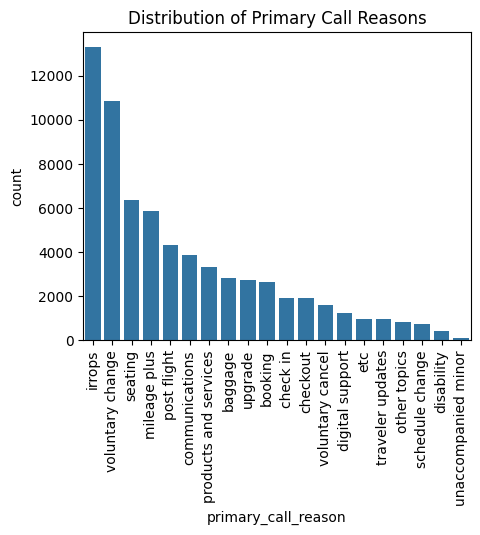

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


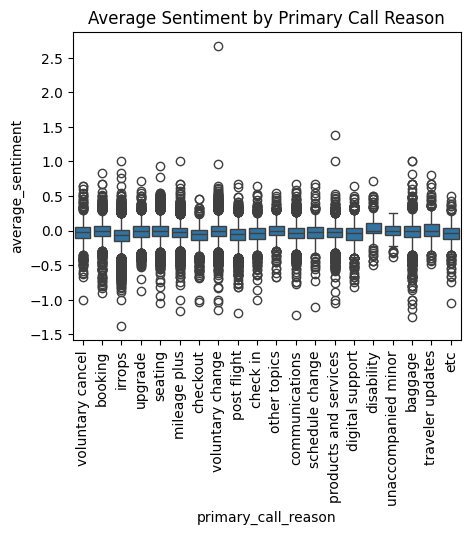

Model Accuracy: 0.24559297877128497
                       precision    recall  f1-score   support

              baggage       0.00      0.00      0.00       604
              booking       0.28      0.07      0.11       513
             check in       0.00      0.00      0.00       359
             checkout       0.00      0.00      0.00       384
       communications       0.07      0.00      0.00       757
      digital support       0.00      0.00      0.00       255
           disability       0.00      0.00      0.00        86
                  etc       0.00      0.00      0.00       197
               irrops       0.25      0.74      0.37      2763
         mileage plus       0.37      0.22      0.28      1130
         other topics       0.00      0.00      0.00       174
          post flight       0.24      0.01      0.01       848
products and services       0.00      0.00      0.00       658
      schedule change       0.00      0.00      0.00       146
              seat

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


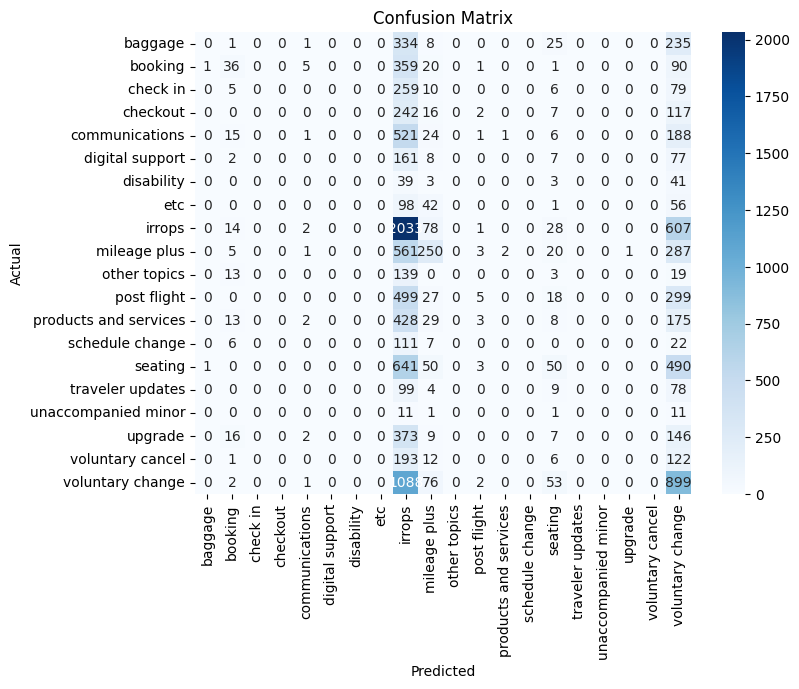

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder



val = sentiment_data['average_sentiment'].mean()
sentiment_data['average_sentiment'].fillna(val, inplace=True)


merged_data = pd.merge(data, customer_data, on='customer_id')
merged_data = pd.merge(merged_data, sentiment_data, on='call_id')
merged_data = pd.merge(merged_data, reason_data, on='call_id')


if 'call_transcript' not in merged_data.columns:
    print("Warning: 'call_transcript' column is missing from merged_data.")
    merged_data['call_transcript'] = ""

print(merged_data.head())
print(merged_data.info())

elite_mode = customer_data['elite_level_code'].mode()[0]
merged_data['elite_level_code'].fillna(elite_mode, inplace=True)

merged_data['primary_call_reason'] = (
    merged_data['primary_call_reason']
    .str.replace('-', ' ')
    .str.replace('&', 'and')
    .str.replace(r'\s+', ' ', regex=True)
    .str.strip()
    .str.lower()
)


merged_data['call_start_datetime'] = pd.to_datetime(merged_data['call_start_datetime'])
merged_data['call_end_datetime'] = pd.to_datetime(merged_data['call_end_datetime'])
merged_data['agent_assigned_datetime'] = pd.to_datetime(merged_data['agent_assigned_datetime'])

merged_data['call_duration'] = (merged_data['call_end_datetime'] - merged_data['call_start_datetime']).dt.total_seconds()

plt.figure(figsize=(5, 4))
sns.countplot(data=merged_data, x='primary_call_reason', order=merged_data['primary_call_reason'].value_counts().index)
plt.title('Distribution of Primary Call Reasons')
plt.xticks(rotation=90)
plt.show()


plt.figure(figsize=(5, 4))
sns.boxplot(data=merged_data, x='primary_call_reason', y='average_sentiment')
plt.title('Average Sentiment by Primary Call Reason')
plt.xticks(rotation=90)
plt.show()

le_reason = LabelEncoder()
merged_data['primary_call_reason_encoded'] = le_reason.fit_transform(merged_data['primary_call_reason'])

tfidf = TfidfVectorizer(max_features=1000, stop_words='english')
if 'call_transcript' in merged_data.columns:
    tfidf_matrix = tfidf.fit_transform(merged_data['call_transcript'].fillna("")).toarray()
else:
    tfidf_matrix = np.zeros((merged_data.shape[0], 1000))

X = np.hstack([
    tfidf_matrix,
    merged_data[['call_duration', 'average_sentiment', 'silence_percent_average', 'elite_level_code']].fillna(0).values
])
y = merged_data['primary_call_reason_encoded']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

print("Model Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=le_reason.classes_))


cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le_reason.classes_, yticklabels=le_reason.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

test_df = pd.read_csv('/content/drive/MyDrive/United_Hackathon/testbc7185d.csv')

required_columns = ['call_duration', 'average_sentiment', 'silence_percent_average', 'elite_level_code']
for col in required_columns:
    if col not in test_df.columns:
        print(f"Warning: '{col}' column is missing from test_df. Filling with default values.")
        test_df[col] = 0

if 'call_transcript' not in test_df.columns:
    print("Warning: 'call_transcript' column is missing from test_df.")
    test_df['call_transcript'] = ""

test_tfidf = tfidf.transform(test_df['call_transcript'].fillna("")).toarray()
X_test_final = np.hstack([
    test_tfidf,
    test_df[required_columns].fillna(0).values
])


test_predictions = model.predict(X_test_final)
test_df['primary_call_reason'] = le_reason.inverse_transform(test_predictions)


test_df[['call_id', 'primary_call_reason']].to_csv('test_shohel.csv', index=False)
print("Predictions saved to test_shohel.csv")


In [ ]:
pd.read_csv('test_shohel.csv')

,call_id,primary_call_reason
0,7732610078,seating
1,2400299738,baggage
2,6533095063,booking
3,7774450920,baggage
4,9214147168,baggage
...,...,...
5152,5300201106,baggage
5153,727694488,baggage
5154,147487837,irrops
5155,5330794838,seating
